# Project Fritz & Franz

## Initial loading of the data

Following is a code by Emese:

In [224]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Reading JSON into dataframe
df = pd.read_json("https://raw.githubusercontent.com/murpi/wilddata/master/quests/beverage_dispenser.json")

# Checking out number of rows and columns
print(f"Shape of the loaded dataframe: {df.shape}")

# Dataframe modification to read the "content" as columns
df4 = df["content"].apply(pd.Series).merge(df, left_index=True, right_index = True)

# Checking out number of rows and columns
print(f"Shape of the modified dataframe: {df4.shape}")

# Dropping unnecessary column "content"
dataset=df4.drop(columns="content")

# Conversion of column "date" to Timestamp
dataset["date"] = pd.to_datetime(dataset["date"])


Shape of the loaded dataframe: (11042, 1)
Shape of the modified dataframe: (11042, 4)


I need to find out how to fill out the "coffee", "soda", "nrj" every time something is bought.

My thoughts:
  * I need to store actual status inside a list
  * There will be 4 lists (machines) = A, B, C, D
  * Could also be a dictionary


In [225]:
# Making sure every machine data started with a refill
[dataset[dataset["machine"]==x].head(1) for x in ["A", "B", "C", "D"]]

[                       date product machine
 0 2019-11-14 11:53:35+00:00  refill       A,
                        date product machine
 6 2019-11-14 12:47:09+00:00  refill       B,
                         date product machine
 24 2019-11-14 13:51:23+00:00  refill       C,
                         date product machine
 43 2019-11-14 14:54:30+00:00  refill       D]

## Processing into stock amounts by datetime

In [226]:
# Processing of the dataset into stock amounts dataset (using lists)
dates = []
machines = []
coffees = []
sodas = []
nrjs = []
refills = []
# Profit only accounts for sales and refills
# i.e. costs for monthly renting the place and yearly maintenance are
# not accounted for
# profit = []

# Here I'm going to translate entries into stock amounts.
# That means whenever there's refill, I will reset amounts to 280, 120, 60.
# Then whenever there's any purchase on one of the machines, I will subtract
# the particular item from stock amount on that machine.
#
# So I have to keep track on what was the last index updated for each machine and product.
# These arrays are initiated as -1, as there's no "last updated" value (0 would be first)
# Machines:    A   B   C   D
coffee_upd = [-1, -1, -1, -1]
soda_upd =   [-1, -1, -1, -1]
nrj_upd =    [-1, -1, -1, -1]
refill_counter = [0, 0, 0, 0]
# profit_upd = [-1, -1, -1, -1]

# Now we need to update the lists everytime there's purchase or refill
# We iterate over dataset rows 
for index, row in dataset.iterrows():
    
    #print("================")
    
    # Date remains unmodified, let's append it.
    #print(f"Appending date {row['date']}")
    dates.append(row["date"])
    
    # Append the name of the machine the purchase was made on.
    #print(f"Appending machine {row['machine']}")
    machines.append(row["machine"])
        
    # Determine machine index (A=0, B=1, C=2, D=3, etc.)
    # so we can mark which values were updated in the lists
    machine_idx = ord(row["machine"])-65
    # print(f"Machine index ({row['machine']}) is {machine_idx}")

    # Reset item stocks to full (280, 120, 60) when REFILL happens
    if row["product"]=="refill":

        # Increment refill
        refill_counter[machine_idx] +=1

        #print(row["product"])
        
        # Printing out current update indexes and the elements
        #print(f"Current machine index: {machine_idx}")
        #print(f"Current update index for coffee: {coffee_upd[machine_idx]}")
        #print(f"Current update index for soda: {soda_upd[machine_idx]}")
        #print(f"Current update index for NRJ: {nrj_upd[machine_idx]}")
        
        # print(f"Current stock (coffee) = {coffees[coffee_upd[machine_idx]]}")
        
        # This is simple, because we fill current machine up
        #print(f"Appending new value (280) to coffees list to position {len(coffees)}.")
        coffees.append(280)
        sodas.append(120)
        nrjs.append(60)

        #print(f"Last element of coffees now = {coffees[-1]}.")
        
        
    elif row["product"]=="coffee":
        # Coffee is purchased
        # Append to coffee_list stock amount of coffee of the particular machine
        # decreased by 1
        
        
        #print(row["product"])
        
        # Printing out current update indexes and the elements
        #print(f"Current machine index: {machine_idx}")
        #print(f"Current update index for coffee: {coffee_upd[machine_idx]}")
        #print(f"Current update index for soda: {soda_upd[machine_idx]}")
        #print(f"Current update index for NRJ: {nrj_upd[machine_idx]}")
        
        #print(f"Current stock (coffee) = {coffees[coffee_upd[machine_idx]]}")
        
        # Find last updated value via coffee_upd[machine_idx], then decrease by 1
        # and append onto the end of the list
        #print(f"Appending new value {int(coffees[coffee_upd[machine_idx]]-1)} to coffees list to position {len(coffees)}.")
        coffees.append(int(coffees[coffee_upd[machine_idx]]-1))
        #print(f"Last element of coffees now = {coffees[-1]}.")
        
        # Append last updated value (copy)
        sodas.append(int(sodas[soda_upd[machine_idx]]))
        
        # Append last updated value (copy)
        nrjs.append(int(nrjs[nrj_upd[machine_idx]]))
        
        #print(f"New stock (coffee) = {coffees[-1:]}")
        
    elif row["product"]=="soda":
        # Soda is purchased
                
        #print(row["product"])
        #print(f"Old stock (soda) = {sodas[soda_upd[machine_idx]]}")
        
        # Append last updated value (copy)
        coffees.append(int(coffees[coffee_upd[machine_idx]]))
               
        # Append last updated value -1
        sodas.append(int(sodas[soda_upd[machine_idx]]-1))
        
        # Append last updated value (copy)
        nrjs.append(int(nrjs[nrj_upd[machine_idx]]))
        
        #print(f"New stock (soda) = {sodas[-1:]}")
        
    elif row["product"]=="nrj":
        # NRJ is purchased

        #print(row["product"])
        #print(f"Old stock (NRJ) = {nrjs[nrj_upd[machine_idx]]}")
                       
        # Append last updated value (copy)
        coffees.append(int(coffees[coffee_upd[machine_idx]]))
        
        # Append last updated value (copy)
        sodas.append(int(sodas[soda_upd[machine_idx]]))
                       
        # Append last updated value -1
        nrjs.append(int(nrjs[nrj_upd[machine_idx]]-1))
        
        #print(f"New stock (NRJ) = {nrjs[-1:]}")
        
    else:
        print("Unknown product found!")

    # Store refill number
    refills.append(refill_counter[machine_idx])
        
    # Now we have to update the particular index - all 3 products get update every time
    #print(f"Updating update lists (+1)")
    coffee_upd[machine_idx]=len(coffees)-1
    soda_upd[machine_idx]=len(sodas)-1
    nrj_upd[machine_idx]=len(nrjs)-1
    
    #print(coffee_list)
    #print(soda_list)
    #print(nrj_list)
    
    #print(f"Status of update lists after update:")
    #print(coffee_upd)
    #print(soda_upd)
    #print(nrj_upd)

#print(len(coffees))    
#print(coffees)

In [227]:
# Now create empty dataframe
df=pd.DataFrame()

In [228]:
# Fill it with the lists
df["dates"]=dates
df["machines"]=machines
df["coffee"]=coffees
df["soda"]=sodas
df["nrj"]=nrjs
df["refill"]=refills

In [229]:
# Splitting per days
df["day"] = df["dates"].dt.strftime("%A")

# Splitting per dates
df["date"] = df["dates"].dt.strftime("%Y-%m-%d")

# Splitting per time
df["time"] = df["dates"].dt.strftime("%H:%M:%S")

In [230]:
# Sub-dataframe for machine A and particular day = "2019-11-18"
df[(df["machines"]=="A") & (df["date"]=="2019-11-18")]

,dates,machines,coffee,soda,nrj,refill,day,date,time
1224,2019-11-18 01:40:06+00:00,A,115,25,14,1,Monday,2019-11-18,01:40:06
1237,2019-11-18 05:32:31+00:00,A,114,25,14,1,Monday,2019-11-18,05:32:31
1240,2019-11-18 05:38:53+00:00,A,113,25,14,1,Monday,2019-11-18,05:38:53
1243,2019-11-18 05:45:15+00:00,A,112,25,14,1,Monday,2019-11-18,05:45:15
1254,2019-11-18 06:02:30+00:00,A,111,25,14,1,Monday,2019-11-18,06:02:30
...,...,...,...,...,...,...,...,...,...
1645,2019-11-18 19:21:20+00:00,A,38,2,12,1,Monday,2019-11-18,19:21:20
1647,2019-11-18 19:33:25+00:00,A,38,1,12,1,Monday,2019-11-18,19:33:25
1669,2019-11-18 23:02:30+00:00,A,38,1,11,1,Monday,2019-11-18,23:02:30
1672,2019-11-18 23:23:59+00:00,A,38,0,11,1,Monday,2019-11-18,23:23:59


In [231]:
# Splitting per machines - this was done only because I didn't know better
df_A=df[df["machines"]=="A"]
df_B=df[df["machines"]=="B"]
df_C=df[df["machines"]=="C"]
df_D=df[df["machines"]=="D"]

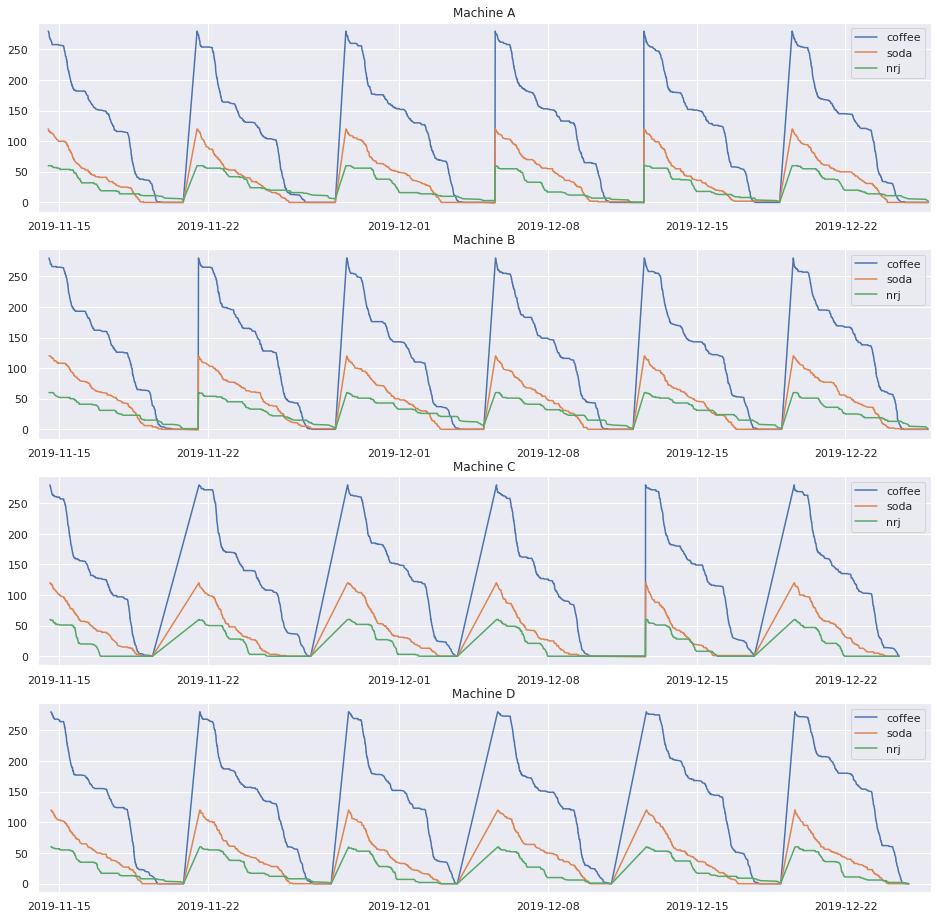

In [232]:
# Let's do some quick plotting
fig, ax = plt.subplots(4,1)

(ax1, ax2, ax3, ax4) = ax

fig.set_size_inches(16, 16)

ax1.plot("dates", "coffee", data=df_A, label="coffee")
ax1.plot("dates", "soda", data=df_A, label="soda")
ax1.plot("dates", "nrj", data=df_A, label="nrj")
ax1.set_xlim([dt.date(2019, 11, 14), dt.date(2019, 12, 26)])
ax1.set_title("Machine A")
ax1.legend()

ax2.plot("dates", "coffee", data=df_B, label="coffee")
ax2.plot("dates", "soda", data=df_B, label="soda")
ax2.plot("dates", "nrj", data=df_B, label="nrj")
ax2.set_xlim([dt.date(2019, 11, 14), dt.date(2019, 12, 26)])
ax2.set_title("Machine B")
ax2.legend()

ax3.plot("dates", "coffee", data=df_C, label="coffee")
ax3.plot("dates", "soda", data=df_C, label="soda")
ax3.plot("dates", "nrj", data=df_C, label="nrj")
ax3.set_xlim([dt.date(2019, 11, 14), dt.date(2019, 12, 26)])
ax3.set_title("Machine C")
ax3.legend()

ax4.plot("dates", "coffee", data=df_D, label="coffee")
ax4.plot("dates", "soda", data=df_D, label="soda")
ax4.plot("dates", "nrj", data=df_D, label="nrj")
ax4.set_xlim([dt.date(2019, 11, 14), dt.date(2019, 12, 26)])
ax4.set_title("Machine D")
ax4.legend()

fig.show()

In [233]:
# Exporting the data
df.to_csv("franz_und_fritz.csv", index=False)

# Plots powered by seaborn

## Overview of sales by each refill and machine

### Data preparation

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11042 entries, 0 to 11041
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   dates     11042 non-null  datetime64[ns, UTC]
 1   machines  11042 non-null  object             
 2   coffee    11042 non-null  int64              
 3   soda      11042 non-null  int64              
 4   nrj       11042 non-null  int64              
 5   refill    11042 non-null  int64              
 6   day       11042 non-null  object             
 7   date      11042 non-null  object             
 8   time      11042 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 776.5+ KB


In [254]:
df["date"].unique()

array(['2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
       '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
       '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25',
       '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29',
       '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03',
       '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-07',
       '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
       '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
       '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19',
       '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23',
       '2019-12-24', '2019-12-25'], dtype=object)

In [255]:
# When refills happen?
print(dataset[dataset["product"]=="refill"]["date"].dt.date.unique())

# 2019-11-14
# 2019-11-21
# 2019-11-28
# 2019-12-05
# 2019-12-12
# 2019-12-19

[datetime.date(2019, 11, 14) datetime.date(2019, 11, 21)
 datetime.date(2019, 11, 28) datetime.date(2019, 12, 5)
 datetime.date(2019, 12, 12) datetime.date(2019, 12, 19)]


In [256]:
# Melting test
# Necessary for FacetGrid plotting (multiple products)
melted_df=pd.melt(df, id_vars=["dates","machines","day","date","time", "refill"], var_name="product", ignore_index=True)

In [257]:
melted_df.rename(columns={"value":"amount"}, inplace=True)

In [258]:
melted_df

,dates,machines,day,date,time,refill,product,amount
0,2019-11-14 11:53:35+00:00,A,Thursday,2019-11-14,11:53:35,1,coffee,280
1,2019-11-14 12:06:35+00:00,A,Thursday,2019-11-14,12:06:35,1,coffee,279
2,2019-11-14 12:07:59+00:00,A,Thursday,2019-11-14,12:07:59,1,coffee,279
3,2019-11-14 12:13:45+00:00,A,Thursday,2019-11-14,12:13:45,1,coffee,279
4,2019-11-14 12:22:35+00:00,A,Thursday,2019-11-14,12:22:35,1,coffee,278
...,...,...,...,...,...,...,...,...
33121,2019-12-25 20:10:53+00:00,A,Wednesday,2019-12-25,20:10:53,6,nrj,3
33122,2019-12-25 20:16:30+00:00,B,Wednesday,2019-12-25,20:16:30,6,nrj,2
33123,2019-12-25 20:26:35+00:00,B,Wednesday,2019-12-25,20:26:35,6,nrj,1
33124,2019-12-25 21:11:55+00:00,B,Wednesday,2019-12-25,21:11:55,6,nrj,0


In [259]:
melted_df[(melted_df['date']=="2019-11-14") & (melted_df['time']=="11:53:35")]

,dates,machines,day,date,time,refill,product,amount
0,2019-11-14 11:53:35+00:00,A,Thursday,2019-11-14,11:53:35,1,coffee,280
11042,2019-11-14 11:53:35+00:00,A,Thursday,2019-11-14,11:53:35,1,soda,120
22084,2019-11-14 11:53:35+00:00,A,Thursday,2019-11-14,11:53:35,1,nrj,60


In [260]:
# Making a subset of the data (first refill)
refill13_df = melted_df.loc[(melted_df["refill"]>=1) & (melted_df["refill"]<=3)]

In [261]:
# Making a subset of the data (first refill)
refill46_df = melted_df.loc[(melted_df["refill"]>=4) & (melted_df["refill"]<=6)]

### Plotting

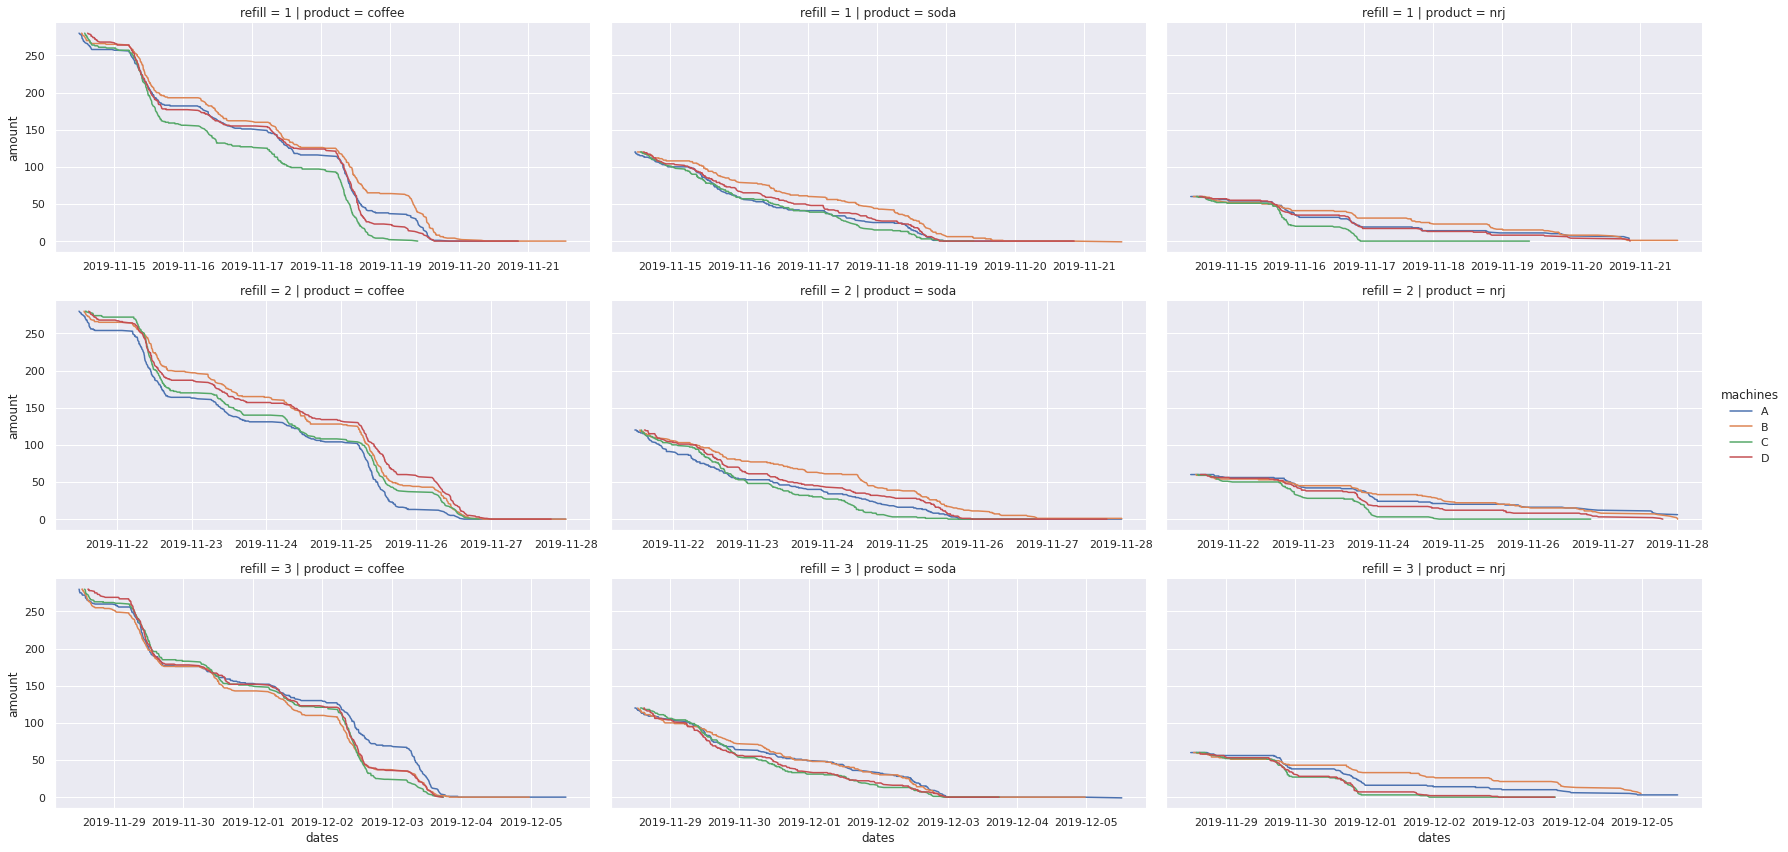

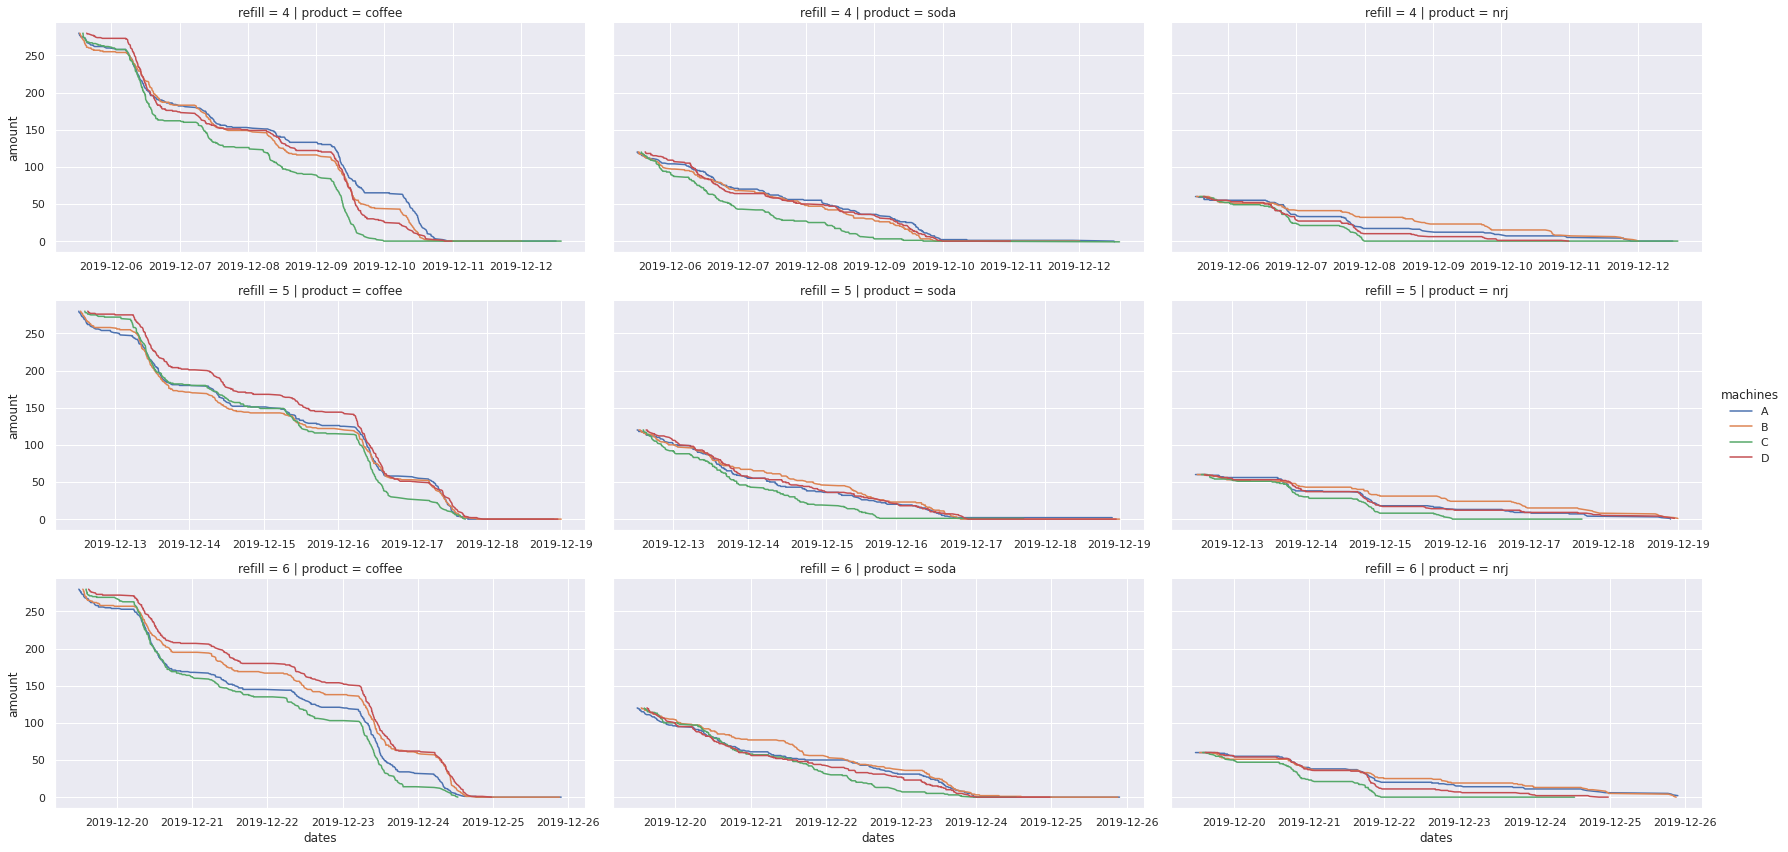

In [281]:
### Plotting using seaborn

# Let's create simple line plot in a FacetGrid (or whatever) 7 days x 4 machines

sns.set_theme()

# Refills 1-3
g = sns.FacetGrid(refill13_df, col="product", row="refill", hue="machines", height=4, aspect=2, sharex=False)

g.map(sns.lineplot, "dates", "amount")
g.add_legend()
#sns.axes_style("darkgrid")

g.fig.show()

# Refills 4-6
g = sns.FacetGrid(refill46_df, col="product", row="refill", hue="machines", height=4, aspect=2, sharex=False)

g.map(sns.lineplot, "dates", "amount")
g.add_legend()

g.fig.show()


## Overview of sales by hours

In [282]:
dataset

,date,product,machine
0,2019-11-14 11:53:35+00:00,refill,A
1,2019-11-14 12:06:35+00:00,coffee,A
2,2019-11-14 12:07:59+00:00,soda,A
3,2019-11-14 12:13:45+00:00,soda,A
4,2019-11-14 12:22:35+00:00,coffee,A
...,...,...,...
11037,2019-12-25 20:10:53+00:00,nrj,A
11038,2019-12-25 20:16:30+00:00,nrj,B
11039,2019-12-25 20:26:35+00:00,nrj,B
11040,2019-12-25 21:11:55+00:00,nrj,B


In [283]:
# Create dataframe without refills

cleaned_dataset = pd.DataFrame(dataset[dataset["product"]!="refill"])

In [284]:
cleaned_dataset["hour_of_day"]=cleaned_dataset["date"].dt.hour
cleaned_dataset["day_of_week"]=cleaned_dataset["date"].dt.strftime('%A')
#cleaned_dataset = cleaned_dataset.reindex(hrs)

In [285]:
sales_rates_df = cleaned_dataset.groupby(by=["day_of_week","hour_of_day","product"], dropna=False).count()
sales_rates_df.rename(columns={"date":"amount"}, inplace=True)

In [286]:
sales_rates_df

amount  machine
day_of_week hour_of_day product                 
Friday      0           coffee       18       18
                        nrj          16       16
                        soda         28       28
            1           coffee       23       23
                        nrj          12       12
...                                 ...      ...
Wednesday   19          nrj          13       13
            20          nrj          11       11
            21          nrj           8        8
            22          nrj           8        8
            23          nrj           5        5

[327 rows x 2 columns]

In [287]:
hrs=[i for i in range(24)]

In [288]:
hrs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [289]:
sales_rates_df.drop(columns="machine", inplace=True)

In [290]:
sales_rates_df

amount
day_of_week hour_of_day product        
Friday      0           coffee       18
                        nrj          16
                        soda         28
            1           coffee       23
                        nrj          12
...                                 ...
Wednesday   19          nrj          13
            20          nrj          11
            21          nrj           8
            22          nrj           8
            23          nrj           5

[327 rows x 1 columns]

In [291]:
srdf_reindexed = sales_rates_df.reindex(hrs, level="hour_of_day", fill_value=np.nan)

In [292]:
srdf_reindexed.isna()

amount
day_of_week hour_of_day product        
Friday      0           coffee    False
                        nrj       False
                        soda      False
            1           coffee    False
                        nrj       False
...                                 ...
Wednesday   19          nrj       False
            20          nrj       False
            21          nrj       False
            22          nrj       False
            23          nrj       False

[327 rows x 1 columns]

In [293]:
sales_rates_df.reset_index(inplace=True)

In [294]:
sales_rates_df

,day_of_week,hour_of_day,product,amount
0,Friday,0,coffee,18
1,Friday,0,nrj,16
2,Friday,0,soda,28
3,Friday,1,coffee,23
4,Friday,1,nrj,12
...,...,...,...,...
322,Wednesday,19,nrj,13
323,Wednesday,20,nrj,11
324,Wednesday,21,nrj,8
325,Wednesday,22,nrj,8


In [302]:
sales_week_df=sales_rates_df.groupby(by=["day_of_week","product"]).sum()
sales_week_df.drop(columns="hour_of_day", inplace=True)

In [308]:
sales_week_df.reset_index(inplace=True)

In [313]:
sales_week_df.sort_values(by="day_of_week")

,day_of_week,product,amount
0,Friday,coffee,2004
1,Friday,nrj,448
2,Friday,soda,958
3,Monday,coffee,1967
4,Monday,nrj,93
5,Monday,soda,539
6,Saturday,coffee,705
7,Saturday,nrj,451
8,Saturday,soda,444
11,Sunday,soda,465


In [324]:
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Friday': 4,
 'Monday': 0,
 'Saturday': 5,
 'Sunday': 6,
 'Thursday': 3,
 'Tuesday': 1,
 'Wednesday': 2}

In [328]:
sales_week_df['Day_Id'] = sales_week_df.index
sales_week_df['Day_Id'] = sales_week_df['day_of_week'].map(sorterIndex)
#sales_week_df.sort_values(by=["Day_Id","product"], inplace=True, ignore_index=True)
sales_week_df

,day_of_week,product,amount,Day_Id
0,Monday,coffee,1967,0
1,Monday,nrj,93,0
2,Monday,soda,539,0
3,Tuesday,coffee,932,1
4,Tuesday,nrj,88,1
5,Tuesday,soda,22,1
6,Wednesday,coffee,3,2
7,Wednesday,nrj,78,2
8,Thursday,coffee,411,3
9,Thursday,nrj,149,3


### Plotting

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


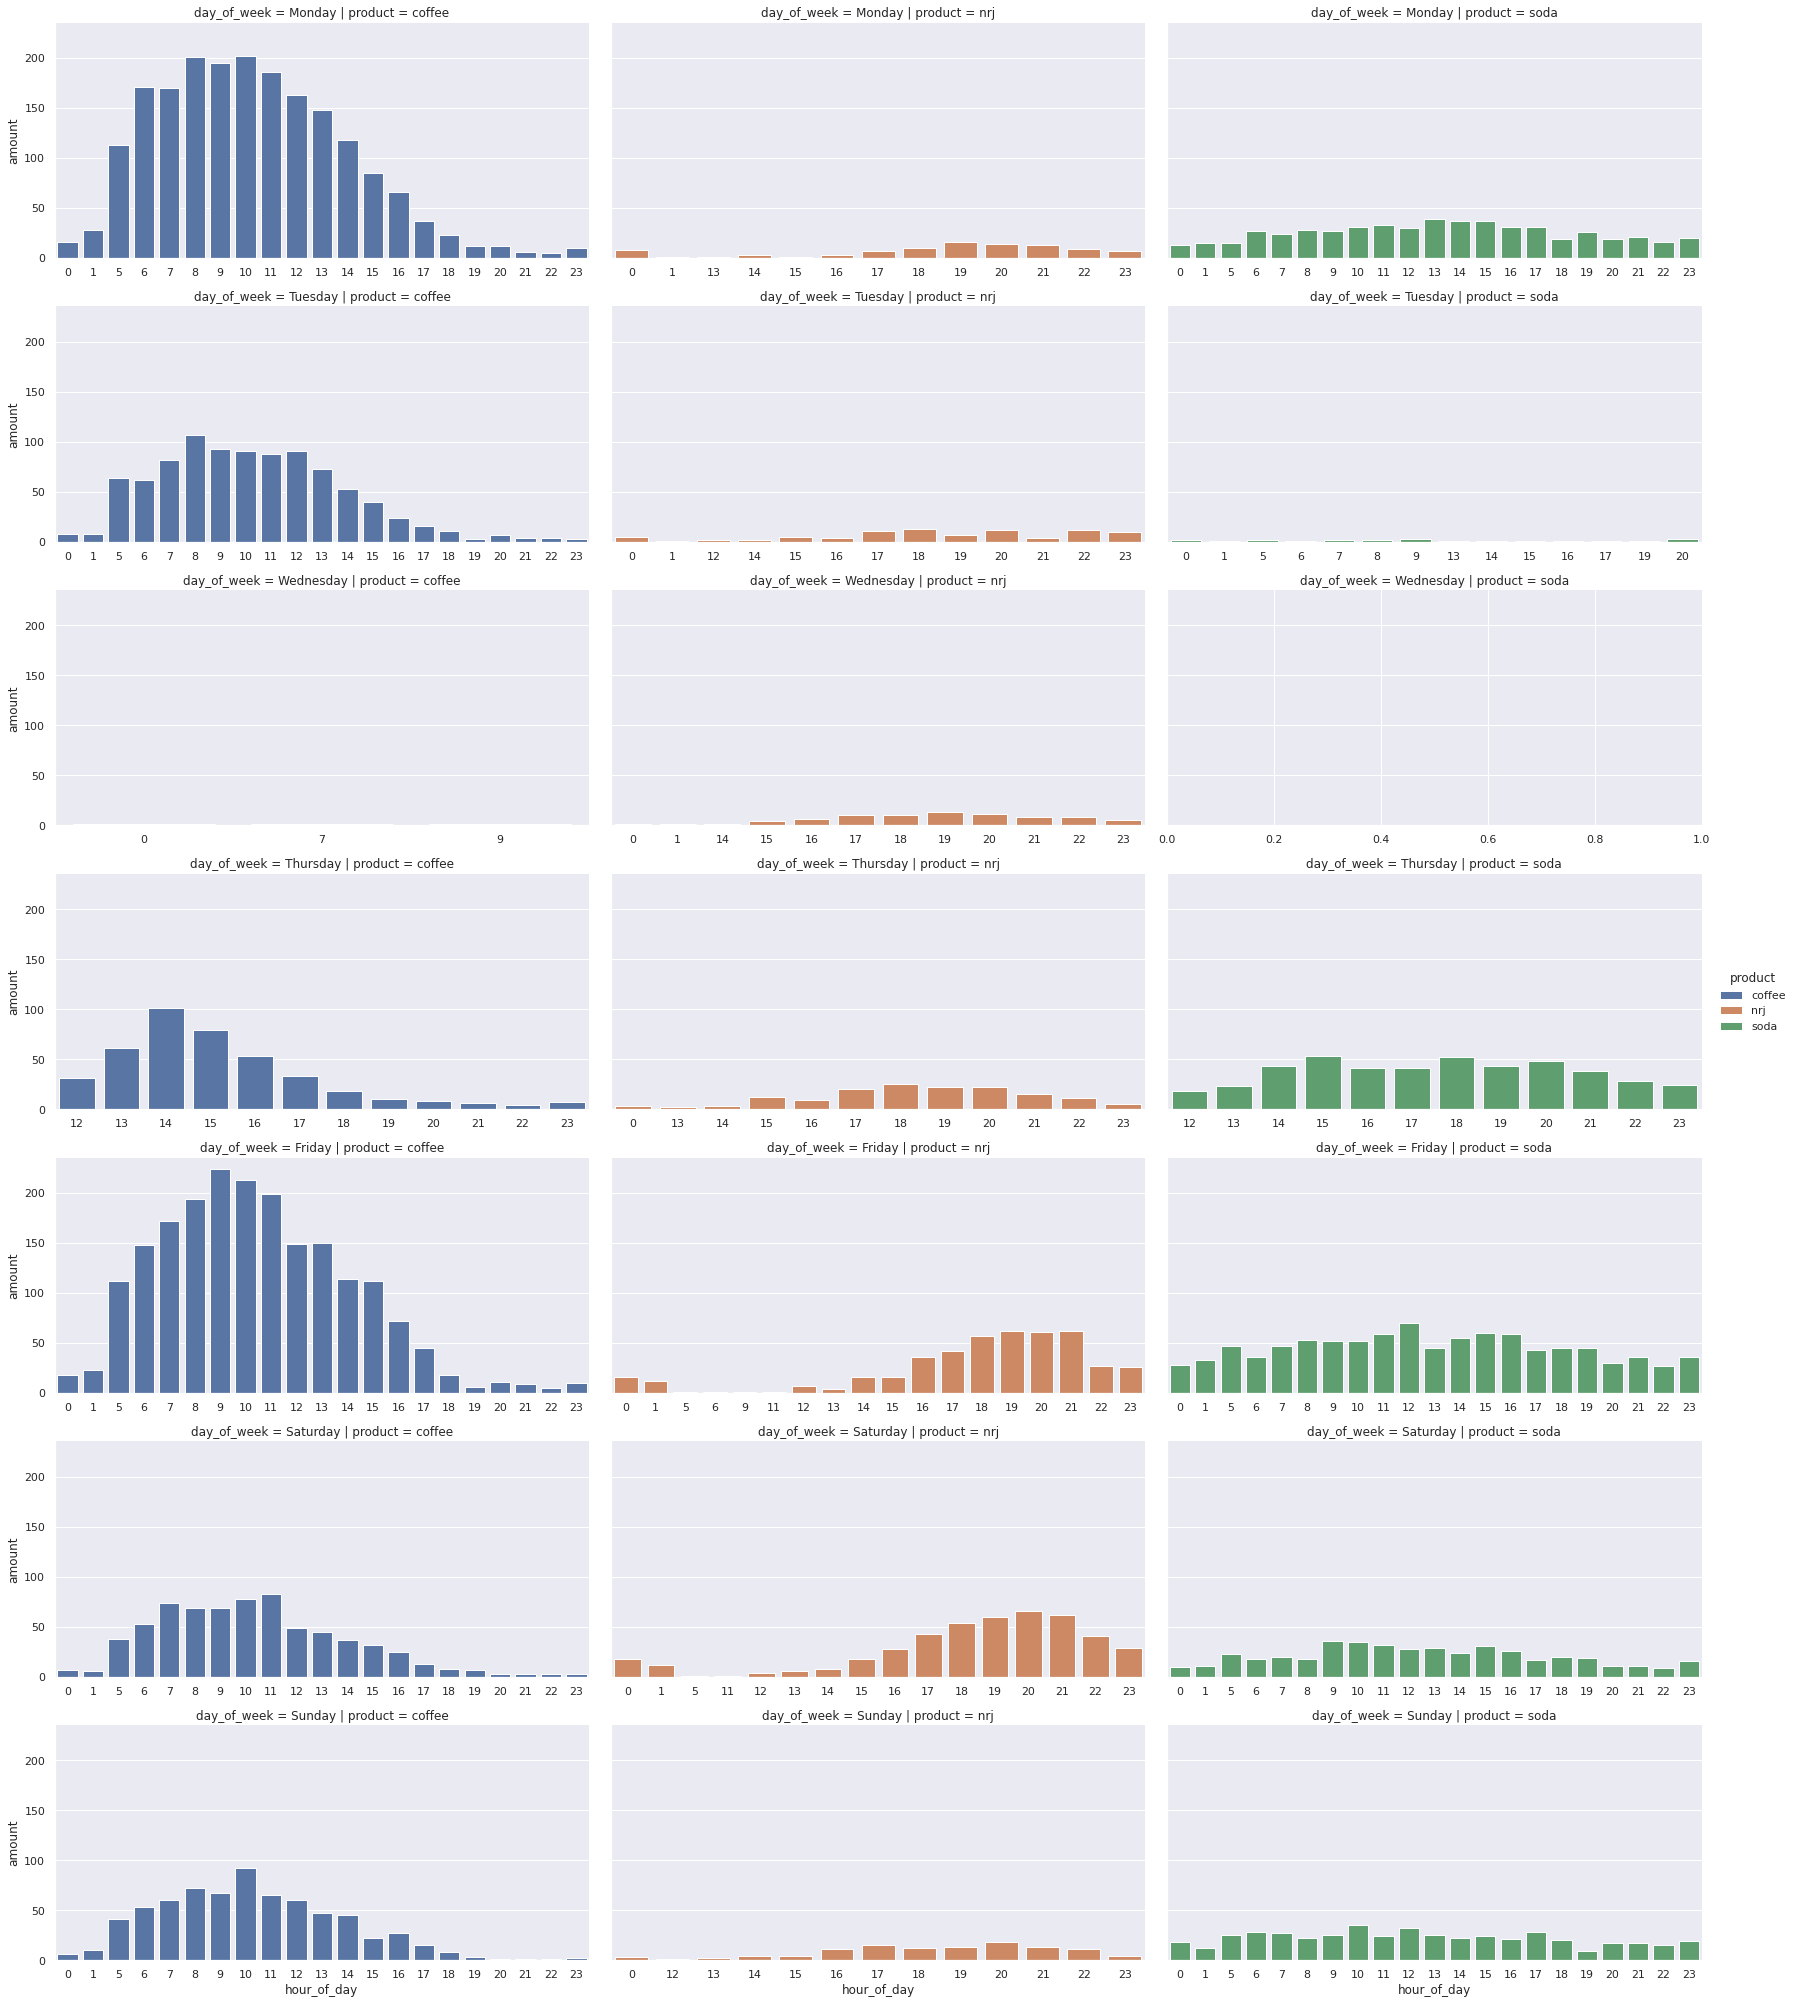

In [297]:
### Plotting using seaborn

# Let's create simple line plot in a FacetGrid (or whatever) 7 days x 4 machines

sns.set_theme()

# 
g = sns.FacetGrid(
    sales_rates_df,
    col="product",
    row="day_of_week",
    row_order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    hue="product",
    height=4,
    aspect=2,
    sharex=False)

g.map(sns.barplot, "hour_of_day", "amount")
g.add_legend()
#sns.axes_style("darkgrid")

g.fig.show()

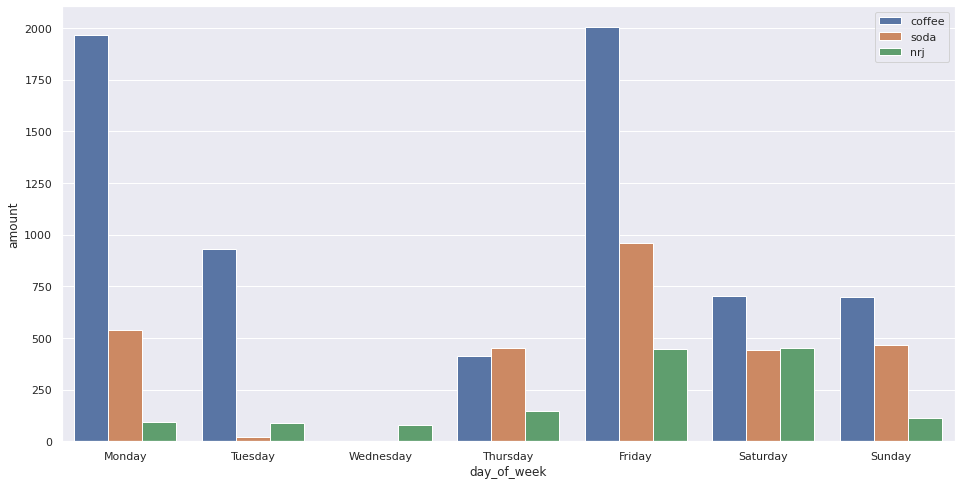

In [336]:
### Plotting using seaborn

# Let's create simple line plot in a FacetGrid (or whatever) 7 days x 4 machines

sns.set_theme()

# 

fig, ax = plt.subplots()

fig.set_size_inches(16, 8)


ax = sns.barplot(x="day_of_week", y="amount", hue="product", hue_order=["coffee", "soda", "nrj"], data=sales_week_df)
ax.legend()
#ax.bar_label()
#sns.axes_style("darkgrid")

fig.show()